In [96]:
# Import libraries
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [97]:
# Load the data
data = pd.read_csv('micro_world.csv', engine='python')

In [98]:
# Filter Philippines
ph_data = data[
    data['economy']=='Philippines'
]

In [99]:
ph_data

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
114292,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,180129353,0.261434,2,66.0,1.0,1,...,4,2,2,4.0,2,3.0,0.0,NaN,0.0,NaN
114293,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,171987745,0.424916,2,24.0,3.0,5,...,1,4,4,4.0,4,1.0,0.0,0.0,1.0,1.0
114294,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,178228576,0.732469,2,88.0,1.0,4,...,4,2,2,4.0,2,5.0,0.0,NaN,0.0,NaN
114295,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,193725076,0.388121,2,30.0,2.0,5,...,4,4,4,4.0,2,5.0,0.0,NaN,0.0,NaN
114296,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,194711242,2.333196,2,33.0,3.0,5,...,1,1,4,2.0,2,1.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115287,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,151988960,1.249522,1,27.0,2.0,1,...,2,4,4,2.0,2,5.0,0.0,NaN,0.0,NaN
115288,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,138300933,0.697020,1,68.0,1.0,1,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
115289,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,134514859,2.614345,2,18.0,2.0,4,...,2,4,4,4.0,4,2.0,0.0,0.0,1.0,1.0
115290,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,145841428,1.916246,1,20.0,2.0,4,...,2,4,4,4.0,2,2.0,0.0,NaN,0.0,NaN


In [100]:
# Filter data
cluster_data = philippine_data[
    [
        'saved',
        'account',
        'educ',
        'inc_q',
        'fin2',
        'fin7',
        
    ]
]

In [101]:
# Create dictionaries for mapping
educational_group_mapping = {
    1: 'completed primary or less',
    2: 'secondary',
    3: 'completed tertiary or more'
}

income_group_mapping = {
    1:'poorest 20%',
    2:'second 20%',
    3:'middle 20%',
    4:'fourth 20%',
    5:'richest 20%'
}

debit_card_ownership_mapping = {
    1: 'yes',
    2: 'no',
    4: 'no'
}

credit_card_ownership_mapping = {
    1: 'yes',
    2: 'no',
    3: 'no',
    4: 'no'
}

saved_mapping = { 
    1: 'yes',
    0: 'no'
}

borrowed_mapping = {
    1: 'yes',
    0: 'no'
}

account_mapping = {
    1: 'yes',
    0: 'no'
}

In [134]:
cluster_data = cluster_data.replace(
    {
        'educ': educational_group_mapping,
        'inc_q': income_group_mapping,
        'account' : account_mapping,
        'saved' : saved_mapping,
        'fin2' : debit_card_ownership_mapping,
        'fin7': credit_card_ownership_mapping
     }
    )

In [135]:
# Check nulls
cluster_data.isna().sum()

saved                     0
has_account               0
educational_background    0
income_group              0
has_debit                 0
has_credit                0
labels                    0
dtype: int64

In [136]:
# Rename columns
cluster_data = cluster_data.rename(
    columns = {
        'educ':'educational_background', 
        'inc_q':'income_group',
        'fin2': 'has_debit',
        'fin7': 'has_credit',
        'account': 'has_account'
        }
)

In [137]:
cluster_data

,saved,has_account,educational_background,income_group,has_debit,has_credit,labels
114292,yes,no,completed primary or less,poorest 20%,2,2,1
114293,yes,yes,completed tertiary or more,richest 20%,1,2,2
114294,yes,yes,completed primary or less,fourth 20%,1,2,2
114295,yes,yes,secondary,richest 20%,1,2,2
114296,yes,yes,completed tertiary or more,richest 20%,1,2,2
...,...,...,...,...,...,...,...
115287,no,no,secondary,poorest 20%,2,2,1
115288,no,no,completed primary or less,poorest 20%,2,2,1
115289,yes,no,secondary,fourth 20%,2,2,0
115290,yes,no,secondary,fourth 20%,2,2,0


**Applying K-Modes Model**

In [138]:
# Create clustering function
def run_kmodes(n_clusters=None, cluster_data=None):
  # Initialize clustering
  kmodes = KModes(
      init="random",
      n_clusters=n_clusters,
      random_state=42
      )
  
  # Apply clustering to the data
  kmodes.fit(cluster_data)

  # Print clustering cost
  print(f"Cost for n_clusters = {n_clusters}: {kmodes.cost_}")

  return kmodes.cost_, kmodes.labels_

In [139]:
# Create container for cost
cost_values = []

In [140]:
# Run clustering and save inertia to our empty container
for k in range(1, 11):
  # Run our function
  cost, labels = run_kmodes(
    n_clusters=k,
    cluster_data=cluster_data
  )

  # Save cost to our container
  cost_values.append(cost)

Cost for n_clusters = 1: 2706.0
Cost for n_clusters = 2: 1898.0
Cost for n_clusters = 3: 1282.0
Cost for n_clusters = 4: 1118.0
Cost for n_clusters = 5: 1019.0
Cost for n_clusters = 6: 965.0
Cost for n_clusters = 7: 924.0
Cost for n_clusters = 8: 842.0
Cost for n_clusters = 9: 816.0
Cost for n_clusters = 10: 777.0


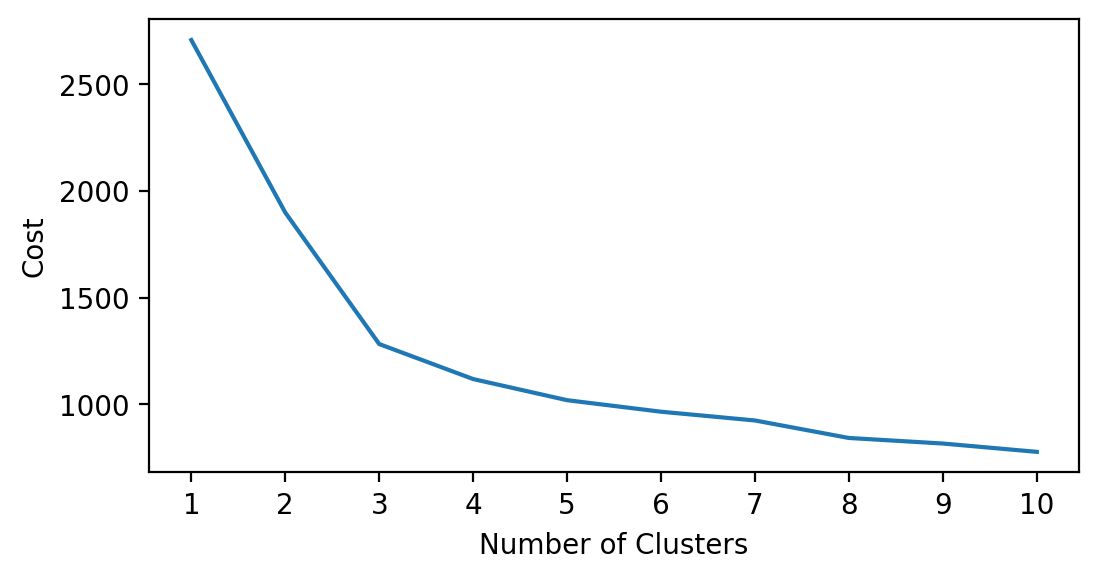

In [141]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 11), cost_values)

# Format plot
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

In [142]:
# Run our K-Modes function for n_clusters=4
cost, labels = run_kmodes(
  n_clusters=3,
  cluster_data=cluster_data
)

Cost for n_clusters = 3: 1282.0


In [143]:
# Inspect labels
labels

array([1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 2,
       2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2,
       1, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 2,
       1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 0,
       2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2,
       1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1,

In [144]:
# Append the labels to cluster data
cluster_data['labels'] = labels

In [145]:
# Show data
cluster_data

,saved,has_account,educational_background,income_group,has_debit,has_credit,labels
114292,yes,no,completed primary or less,poorest 20%,2,2,1
114293,yes,yes,completed tertiary or more,richest 20%,1,2,0
114294,yes,yes,completed primary or less,fourth 20%,1,2,0
114295,yes,yes,secondary,richest 20%,1,2,0
114296,yes,yes,completed tertiary or more,richest 20%,1,2,0
...,...,...,...,...,...,...,...
115287,no,no,secondary,poorest 20%,2,2,1
115288,no,no,completed primary or less,poorest 20%,2,2,1
115289,yes,no,secondary,fourth 20%,2,2,2
115290,yes,no,secondary,fourth 20%,2,2,2


In [123]:
# Inspect the characteristics 
cluster_data.groupby('labels').agg(pd.Series.mode)

,saved,has_account,educational_background,income_group,has_debit,has_credit
labels,,,,,,
0,yes,no,secondary,fourth 20%,2,2
1,no,no,completed primary or less,poorest 20%,2,2
2,yes,yes,secondary,richest 20%,1,2


In [124]:
cluster_data['labels'].value_counts()

0    504
2    256
1    240
Name: labels, dtype: int64

In [125]:
cluster_data['labels'].value_counts()/len(cluster_data)*100

0    50.4
2    25.6
1    24.0
Name: labels, dtype: float64

In [126]:
#largest cluster were people who has not saved and not account, completed primary, and part of the poorest 20 
#-- consistent with our graph that lack of money is the driver for not having an account
# followed by those who saved despite no account, secondary education, and  has no debit credit. 1/3 of people are already saving
# smallest are those who saved who has account
#target those who are already saving to be on the system
#empower those who are poor, less educ, and not in the system

In [127]:
#what5 to call the groups?
#profiles of the group